## Step 1: Importing Libraries
We will start by importing the essential libraries for data analysis, visualization, and model building.

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Styling plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


## Step 2: Load the Dataset
Let’s import our dataset and take a quick look to get familiar with it.


In [2]:
df = pd.read_csv("/content/drive/MyDrive/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Step 3: First Look at the Data

Let's take a peek at what our dataset looks like — check for null values, datatypes, and overall structure.


In [3]:
# Basic info
df.info()

# Checking for missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score            

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Step 4: Exploratory Data Analysis (EDA)

Now for the fun part — we’ll explore relationships between:
- Gender and scores
- Parental education and scores
- Test prep and performance
- And more.

/tmp/ipython-input-4-2891417598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='math score', palette='Set2')


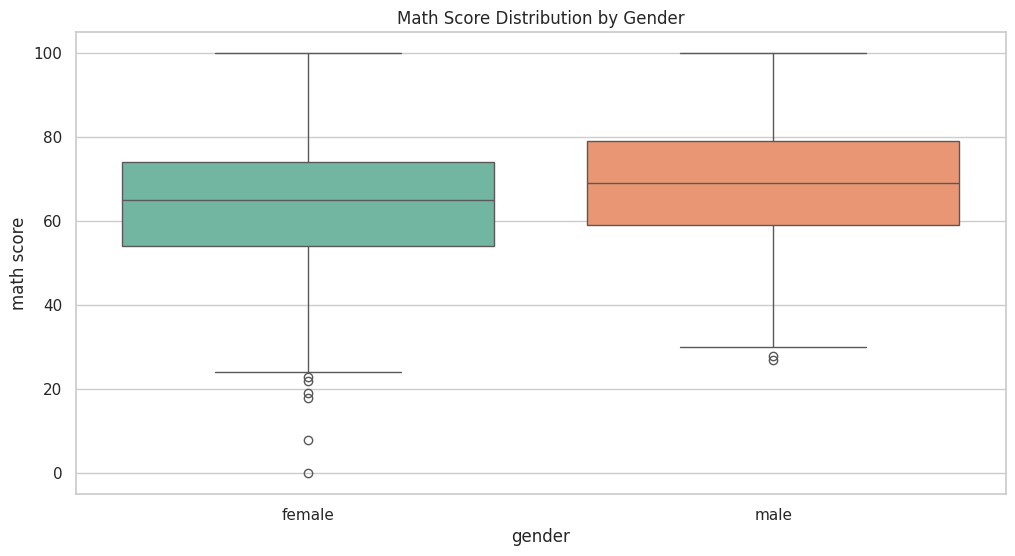

In [4]:
# Gender vs Scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='gender', y='math score', palette='Set2')
plt.title("Math Score Distribution by Gender")
plt.show()


/tmp/ipython-input-5-1589228976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='test preparation course', y='reading score', palette='coolwarm')


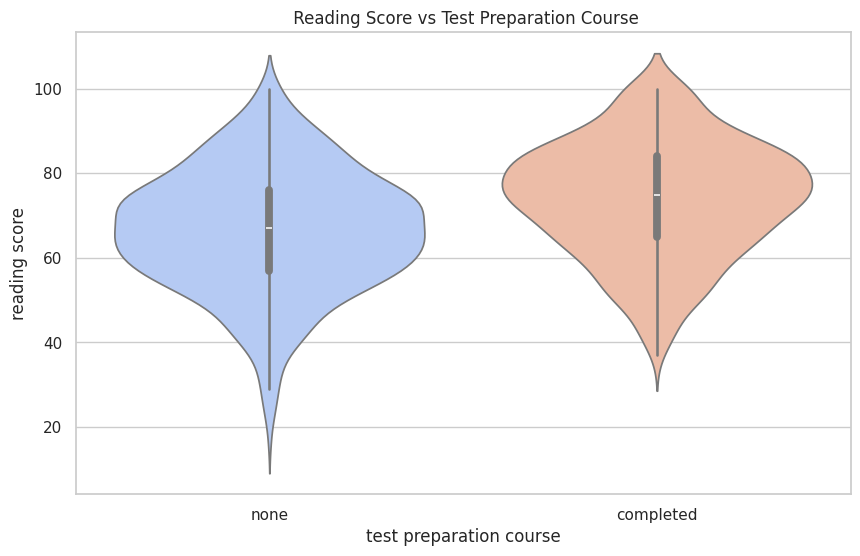

In [5]:
# Test Prep vs Performance
sns.violinplot(data=df, x='test preparation course', y='reading score', palette='coolwarm')
plt.title(" Reading Score vs Test Preparation Course")
plt.show()



/tmp/ipython-input-6-797210662.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='lunch', y='writing score', palette='pastel', ci=None)
/tmp/ipython-input-6-797210662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='lunch', y='writing score', palette='pastel', ci=None)


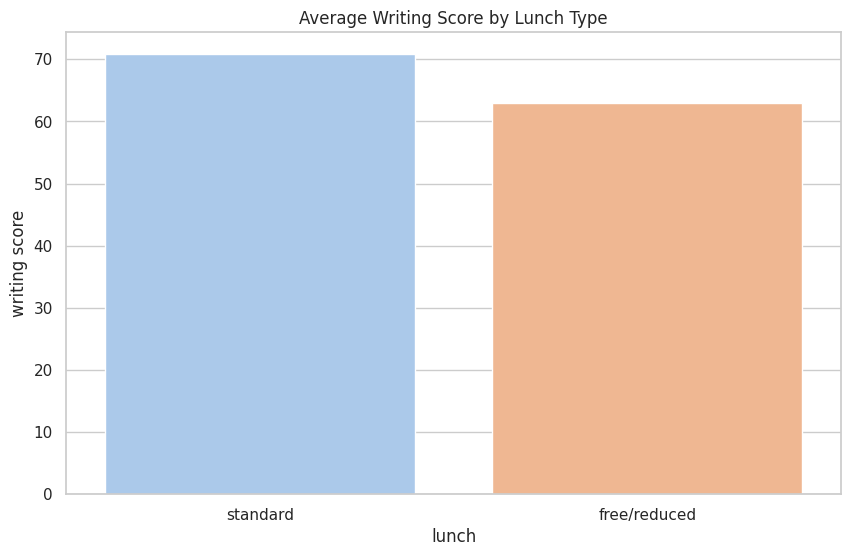

In [6]:
# Lunch Type Effect
sns.barplot(data=df, x='lunch', y='writing score', palette='pastel', ci=None)
plt.title("Average Writing Score by Lunch Type")
plt.show()


/tmp/ipython-input-7-4007811793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='parental level of education', y='math score', palette='viridis')


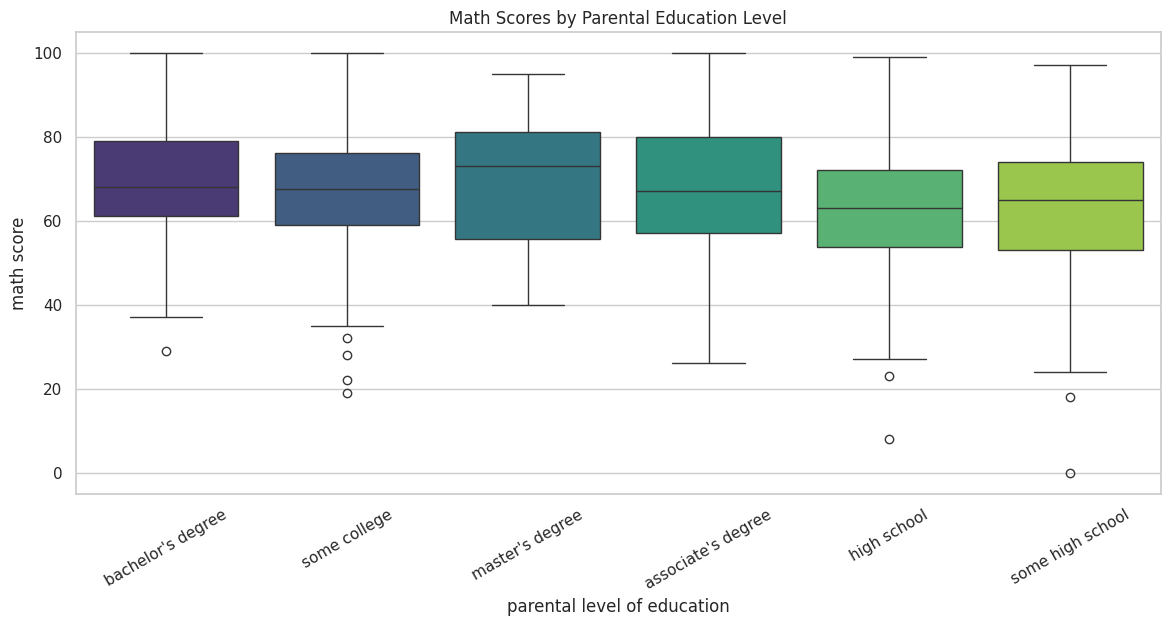

In [7]:
# Parental Education
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='parental level of education', y='math score', palette='viridis')
plt.xticks(rotation=30)
plt.title("Math Scores by Parental Education Level")
plt.show()


## Step 5: Data Preprocessing

Let’s encode the categorical variables and prepare our dataset for model training.


In [8]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df.drop(columns=['reading score', 'writing score']), drop_first=True)

# Target variable: Average score of all 3 subjects
df_encoded['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

df_encoded.head()


,math score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,average_score
0,72,False,True,False,False,False,True,False,False,False,False,True,True,72.666667
1,69,False,False,True,False,False,False,False,False,True,False,True,False,82.333333
2,90,False,True,False,False,False,False,False,True,False,False,True,True,92.666667
3,47,True,False,False,False,False,False,False,False,False,False,False,True,49.333333
4,76,True,False,True,False,False,False,False,False,True,False,True,True,76.333333


## Step 6: Splitting the Data
We will split the data into `80%` training and `20%` testing so we can evaluate how well our model performs on unseen data.


In [9]:
# Features and Target
X = df_encoded.drop(columns=['average_score', 'math score'])
y = df_encoded['average_score']

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 7: Training a Linear Regression Model

Let’s train a simple linear regression model to predict student scores.


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Step 8: Model Evaluation
Let’s now evaluate how well our model performs using common regression metrics.


In [11]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 10.49
Mean Squared Error (MSE): 179.60
Root Mean Squared Error (RMSE): 13.40
R² Score: 0.1622


## Step 9: Visualizing Actual vs Predicted Prices
A scatter plot can help us quickly see how close our predictions are to the real values.


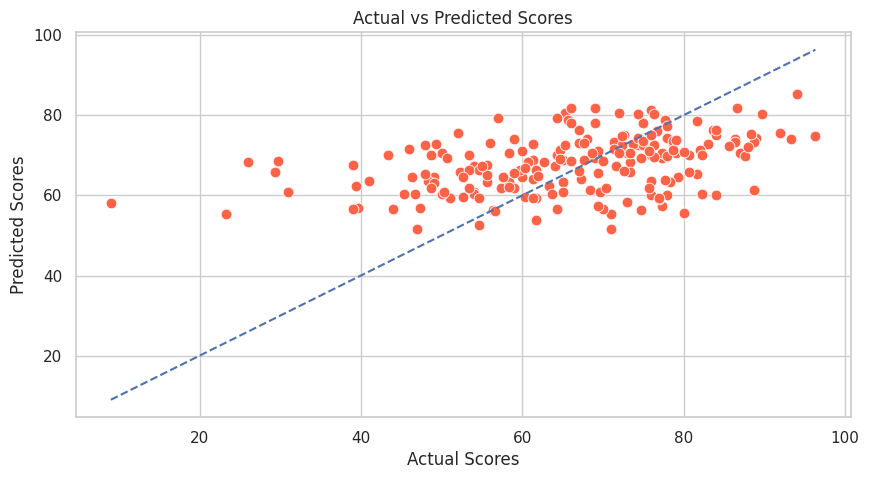

In [12]:
# Comparing Actual vs Predicted
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, color='tomato', s=60)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b--')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.show()


In [13]:
import joblib
joblib.dump(model, "student_score_model.pkl")


['student_score_model.pkl']